# Metodi Monte Carlo

In [1]:
import sys
import numpy as np
import scipy 
import matplotlib.pyplot as plt

## Numeri Casuali (Random) 

Alcuni processi fisici, come quelli legati alla trensizioni quantistiche, sono intrinsecamente legati a fenomeni casuali, in altri casi il numero di variabili in gioco è talmente alto da rendere l'evoluzione apparentemente casuale.

Per tale motivo nello studio dei fenomeni fisici è spesso necessario ricorrere all'utilizzo di numeri generati casualmente (*random*). 

### Generatori

Nella pratica si usano funzioni matematiche appositamente svilupate dall'effetto perfettamete prevedibile per cui si parla della generazione di numeri *preudocasuali* (*pseudorandom*).

Uno dei più semplici geratori sviluppati è il Generatore Lineare Congruenziale (Linear Congruential Generator - LCG in inglese) che può essere espresso tramite la formula:

$$
x' = (ax + c) \% m
$$ 

dove $a$, $c$ ed $m$ sono costanti intere ed $x$ è una variabile intera. 
Il generatore produce una serie di numeri apparentemete casuali se aprtire da un valre $x$ usiamo il valore $x'$ ottenuto nella formala per ottenere un terzo valore, e così di seguito in maniera iterativa.


Implementiamo direttamente un esempio di LCG.

In [2]:
def lcg_random(x, N):
    """
    Funzione che implementa il generatore random LCG
    
    x : valore di partenza
    N : numero di valori generati in totale (incluso il valore di partenza)
    
    impementa la formula iterativa x'=(ax+c)%m
        a =    1664525
        c = 1013904223
        m = 4294967296    
    
    
    restituisce un array di valori compresi nell'intervallo [0,1] (x'/m)
    """
    a =    1664525
    c = 1013904223
    m = 4294967296
    
    xr = np.array([x])
    for i in range(1, N):
        newx = (a*xr[-1]+c)%m 
        xr = np.append( xr, newx )
        
    return xr/m

In [3]:
# Genero 100 valori random tramite LCGutilizzando il punto di partenza x=1
rr1 = lcg_random(1, 100)

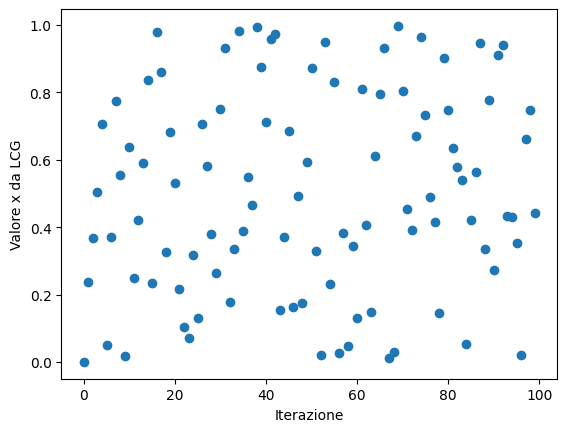

In [4]:
# Grafico dei numeri generati
plt.plot(rr1, 'o')
plt.xlabel('Iterazione')
plt.ylabel('Valore x da LCG')
plt.show()

Cambiando il valore di parenza (*seed*) si ottengono valori diversi. 

In [5]:
# Genero 100 valori random tramite LCGutilizzando il punto di partenza x=2 e x=5
rr2 = lcg_random(2, 100)
rr5 = lcg_random(5, 100)

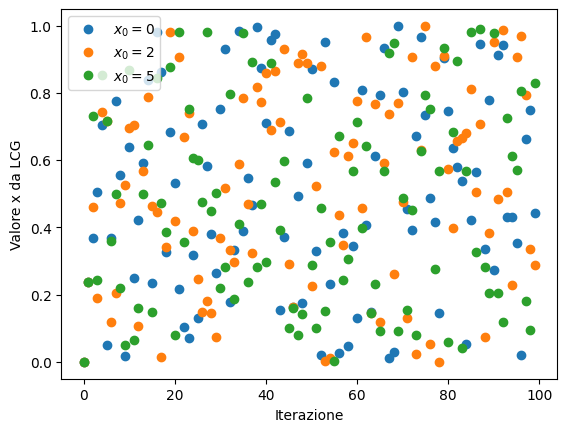

In [6]:
# Confronto graficamente i risultatu
plt.plot(rr1, 'o', label='$x_0=0$')
plt.plot(rr2, 'o', label='$x_0=2$')
plt.plot(rr5, 'o', label='$x_0=5$')
plt.xlabel('Iterazione')
plt.ylabel('Valore x da LCG')
plt.legend()
plt.show()

#### Numpy

`numpy` fornisce una serie di funzionalità per generare numeri pseudo casuali con una periodicità di $2^{128}$ (~$10^{38}$). Per maggiori informazione si può conslultare la [documentazione ufficale](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64).

La funzione di base genera numeri random nell'intervallo $ x \in [0,1[$.

In [7]:
# esempio di geneeazione di numeri random nell'intervallo 0-1
ar = np.random.random(10)

print(ar.size)
print(ar)

10
[2.03718049e-01 2.17358850e-01 5.19761835e-01 9.18687354e-01
 1.53525506e-01 2.57821480e-02 6.44518361e-04 6.76062403e-01
 6.48570139e-02 8.10652571e-01]


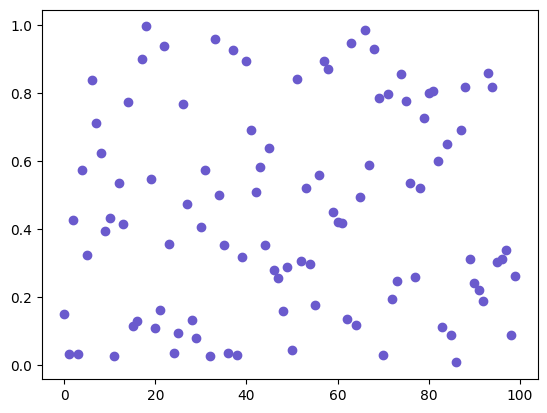

In [8]:
# generazione 100 valori random nell'intervallo (0-1)
ar100 = np.random.random(100)

plt.plot(ar100, 'o', color='slateblue')
plt.show()

### Random Seed

I numeri random generati seguono in realtà una sequenza completamente riproducibile. 
La sequenza può essere ripetuta impostando il `seed` random.

In [9]:
# Genero sequenze random con seed definito per la prima
np.random.seed(12143)
arnd01 = np.random.random(5)
arnd02 = np.random.random(5)

print('arnd01', arnd01)
print('arnd02', arnd02)
print('arnd01-arnd01', arnd01-arnd02)

arnd01 [0.685834   0.71899418 0.89371366 0.4171837  0.08176453]
arnd02 [0.53130108 0.79156996 0.16588073 0.38057987 0.59583026]
arnd01-arnd01 [ 0.15453293 -0.07257579  0.72783293  0.03660382 -0.51406573]


In [10]:
# Genero un'altra sequenze random con lo stesso seed 
np.random.seed(12143)
arnd11 = np.random.random(5)

print('arnd01', arnd01)
print('arnd11', arnd11)
print('arnd11-arnd01', arnd11-arnd01)

arnd01 [0.685834   0.71899418 0.89371366 0.4171837  0.08176453]
arnd11 [0.685834   0.71899418 0.89371366 0.4171837  0.08176453]
arnd11-arnd01 [0. 0. 0. 0. 0.]


## Distribuzioni e Probabilità

`numpy.random` mette a disposizione numerose opzioni per generare numeri random seguendo diverse distribuzioni e in diversi intervalli. 

Esempi notevoli:
* `random.random`: distribuzione uniforme $x \in [0,1[$;
* `random.uniform`: distribuzione uniforme in un itervallo a scelta;
* `random.randint`: numeri interi con probabilità costante in un itervallo a scelta;
* `random.poisson`: distribuzione di Poisson; 
* `random.normal`: distribuzione di Gauss;
* `random.shuffle`: dato un array ne restituisce unp equivalente con ordine degli eleemnti casuale.

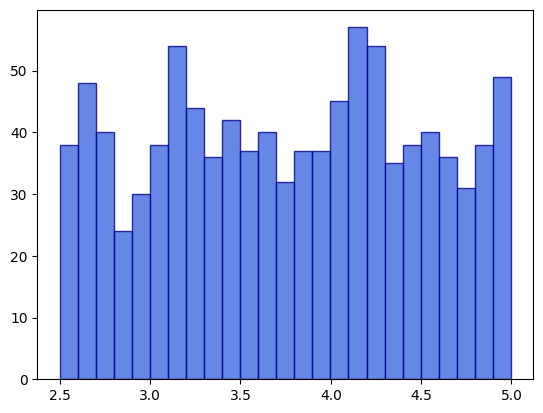

In [11]:
# Esempio con 1000 numeri random distribuiti uniformemente fra 2.5 e 5
runiform = np.random.uniform(low=2.5, high=5.0, size=1000)
plt.hist(runiform, bins=25, alpha=0.8, color='royalblue', ec='darkblue')
plt.show()

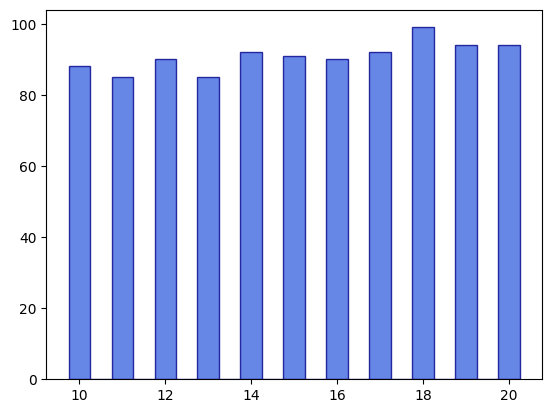

In [12]:
# Esempio con 1000 numeri random interi distribuiti uniformemente fra 10 e 20
rint = np.random.randint(low=10, high=21, size=1000)
plt.hist(rint, bins=21, range=(9.75, 20.25), alpha=0.8, color='royalblue', ec='darkblue')
plt.show()

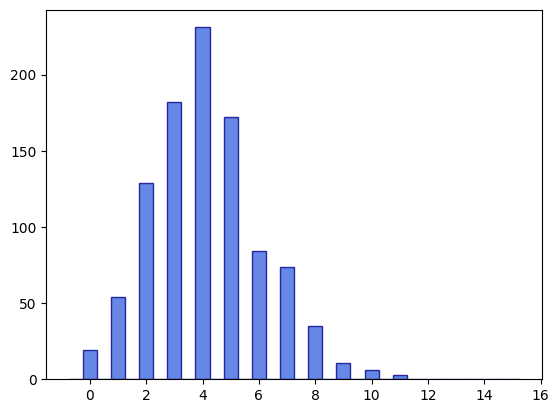

In [13]:
# Esempio con 1000 numeri random secondo la distribuzione di Poisson
rpoisson = np.random.poisson(lam=4, size=1000)
plt.hist(rpoisson, bins=32, range=(-0.75, 15.25), alpha=0.8, color='royalblue', ec='darkblue')
plt.show()

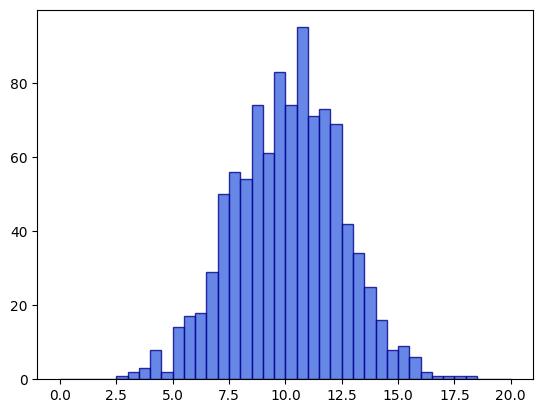

In [14]:
# Esempio con 1000 numeri random secondo la distribuzione di Gauss
rgauss = np.random.normal(loc=10, scale=2.4, size=1000)
plt.hist(rgauss, bins=40, range=(0,20), alpha=0.8, color='royalblue', ec='darkblue')
plt.show()

### Hit or Miss

Può capitare che la distribuzione che si intende utilizzare non sia disponibile fra le varie librerie python per la generazione di numeri random.
Per generare  numeri secondo una qualsiasi distribuzione di probabilità si può utilizzare il metodo *Hit or Miss*.
Il metodo consiste nell'iterare la seguente sequenza di operazioni:
* per semplificare il metodo la funzione $f(x)$ potrebbe essere riscalata in modo tale che nel punto massimo si abbia f(x)=1;
1. si estrae un numero casuale $x_i$ con probabilità uniforme nell'intervallo della variabile $x$;
2. si estrae un numero casuale $y_i$ uniformemente distribuito fra 0 ed 1 (o fra 0 e $f_{max}$);
3. se $y_i \leq f(x_i)$ (*hit*) il valore $x_i$ viene immagazzinato per la distribuzione finale, altrimenti (*miss*) viene rigettato;

#### Funzione Onda Qudra

$$
q(x) = 
\begin{cases}
0.2 \; : \; x \in \,[0,2[ \\
0.01 \; : \; x \in \,[2,3.5[ \\
1.0 \; : \; x \in \,[3.5,4[ \\
0.5 \; : \; x \in \,[4.5,5] \\
0.0 \; : altrove
\end{cases}
$$

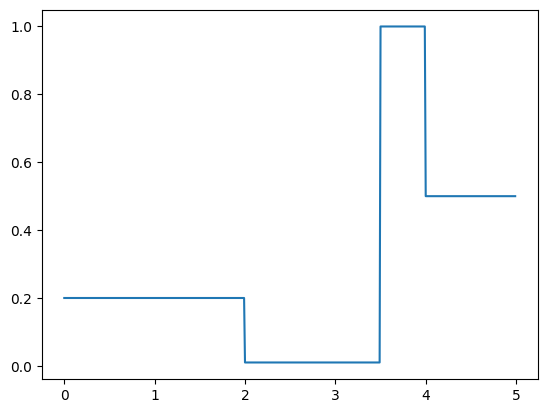

In [15]:
# Esempio di Hit or Miss con funzione ad onda quadra 

def onda_quadra(x): 
    """
    funzione onda_quadra q(x)
    q(x) = 0.2  per 0   <= x < 2
    q(x) = 0.01 per 2   <= x < 3.5
    q(x) = 1.0  per 3.5 <= x < 4
    q(x) = 0.5  per 4   <= x <=5
    """
    
    yy = np.zeros(len(x))
    mask1 = (x >= 0 )  & (x < 2)
    mask2 = (x >= 2 )  & (x < 3.5)
    mask3 = (x >= 3.5) & (x < 4)
    mask4 = (x >= 4  ) & (x < 5)
    
    yy[mask1] = 0.2
    yy[mask2] = 0.01
    yy[mask3] = 1.0
    yy[mask4] = 0.5

    return yy
    

# array per valori x del grafico
xq = np.arange(0, 5, 0.01)
# y funzione onda quadro
yq = onda_quadra(xq)

#grafico funzione onda quadra
plt.plot(xq, yq)
plt.show()


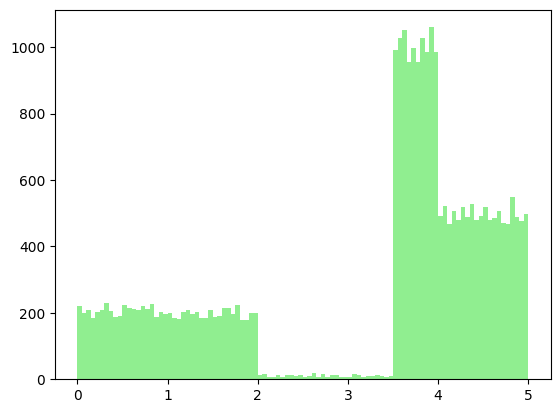

In [16]:

# numero di valori estartti per generare la distribuzione
nsample = 100000

# Genero numeri random con la tecnica di hit or miss a partire da nsample (100k) valori estratti
xhm = np.random.uniform(low=0, high=5, size=nsample)  # Nsample valori di x (0-5)
yhm = np.random.random(nsample)                       # Nsample valori di y (0-1)

# maskera per selezionare punti per cui yhm<f(xhm)
maskhm = yhm <= onda_quadra(xhm)  

# valori di x selezionati tramite la maskera
xdistq = xhm[maskhm]

# Istogramma dei valori x selezionati
plt.hist(xdistq, bins=100, range=(0,5), color='lightgreen')
plt.show()

### Distribuzione Cumulativa

Il metodo Hit or Miss non è il più efficiente in quanto per ogni valore selezionato vanno estratti due numeri random, in più una frazione dei valori estratti viene rigettato.

Un metodo più efficiente si basa sulla distribuzione di probabilità cumulativa di quella che si vuole riprodurre.

Data la distribuzione $f(x)$ nell'intervallo $x \in [a,b]$ e la sua cumulativa $c(x) = \frac{ \int_{a}^x f(x)}{ \int_{a}^{b} f(x)}$:
1. si estrae un numero random $y_i$ uniformemnte distribuito nell'intervallo [0,1];
2. si ricava il valore $x_i = c^{-1}(y_i)$ per la distribuzione da produrre.



Applichamo il metodo della cumulativa per generare la distribuzione ad onda quadra utilizzata sopra per il metodo *Hit or Miss*.

L'integrale totale della funzione onda qudra è:

$$
S_q =\int_0^5 q(x) = \int_0^2 0.2 dx +  \int_{2}^{3.5} 0.01 dx  + \int_{3.5}^{4} dx + \int_{4}^{5} 0.5 dx   
$$

Quindi la distribuzione di probabilità cumulativa sarà:

$$
c_q(x) = \frac{\int_0^x q(x') dx'}{S_q} = \frac{s(x)}{S_q}; \; 
s(x) = 
\begin{cases}
\begin{eqnarray}
0.2 \cdot x \; &:& \; x \in \,[0,2[ \\
0.2 \cdot 2 + 0.01 \cdot (x-2.0) \; &:& \; x \in \, [2,3.5[ \\
0.2 \cdot 2 + 0.01 \cdot 1.5 + 1 \cdot (x-3.5) \; &:& \; x \in \, [3.5,4[ \\
0.2 \cdot 2 + 0.01 \cdot 1.5 + 1 \cdot 0.5 +  0.5 \cdot (x-4.0) \; &:& \; x \in \, [4.5,5] \\
\end{eqnarray}
\end{cases}
$$


In [17]:
def cum_oq(x): 
    """
    Funzione cumulativa di un'onda quadra
    
    onda quadra:     
        q(x) = 0.2  per 0   <= x < 2
        q(x) = 0.01 per 2   <= x < 3.5
        q(x) = 1.0  per 3.5 <= x < 4
        q(x) = 0.5  per 4   <= x <=5
    

    cumulativa Cq(x):
        Cq(x) = 0.2*x                                         per 0   <= x <  2  
        Cq(x) = 0.2*2 + 0.01*(x-2)                            per 2   <= x <  3.5 
        Cq(x) = 0.2*2 + 0.01*(3.5-2) + 1*(x-3.5)              per 3.5 <= x <  4
        Cq(x) = 0.2*2 + 0.01*(3.5-2) + 1*(4-3.5) + 0.5*(x-4)  per 4   <= x <=  5 
        
    
    integrale totale: Sq = 0.2*2 + 0.01*(3.5-2) + 1*(4-3.5) + 0.5*(5-4)
    
    probabilità cumulativa: cq(x) = Cq(x)/Sq
    
    return cq(x)
    """
    
    # Maschere per intervalli di x 
    yy = np.zeros(len(x))
    mask1   = (x >= 0  ) & ( x < 2 )
    mask2   = (x >= 2  ) & ( x < 3.5)
    mask3   = (x >= 3.5) & ( x < 4 )
    mask4   = (x >= 4  )  & ( x <=5 )
    
    # calcolo valore cumulativa per diversi intervalli di x
    yy[mask1]   = 0.2*x[mask1]
    yy[mask2]   = 0.2*2 + 0.01*(x[mask2]-2)
    yy[mask3]   = 0.2*2 + 0.01*1.5 +1.0*(x[mask3]-3.5)
    yy[mask4]   = 0.2*2 + 0.01*1.5 +1.0*(4-3.5) + 0.5*(x[mask4]-4)
  

    # Normalizzazione a 1
    norm1 = 0.2*2 + 0.01*1.5 +1.0*(4-3.5) + 0.5*(5-4)
    
    return yy/norm1
    

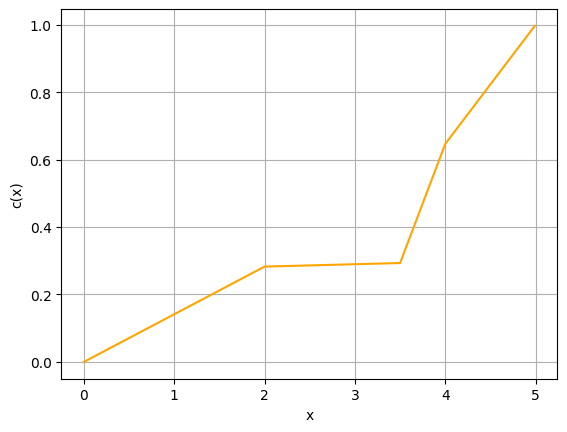

In [18]:
# grafico funzione onda quadra e della sua cumulativa nell'intervallo (0,5)
plt.plot(xq, cum_oq(xq), color='orange')
plt.grid()
plt.xlabel('x')
plt.ylabel('c(x)')
plt.show()

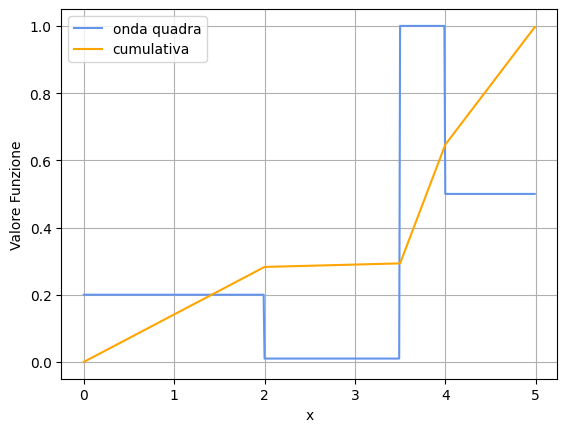

In [19]:
# grafico cumulativa della funzione onda quadra nell'intervallo (0,5)
plt.plot(xq, onda_quadra(xq), color='cornflowerblue',label='onda quadra')
plt.plot(xq, cum_oq(xq),      color='orange',       label='cumulativa')
plt.grid()
plt.xlabel('x')
plt.ylabel('Valore Funzione')
plt.legend()
plt.show()

Definendo:
$$
\begin{eqnarray}
s_1 &=& \int_0^2 0.2 dx  &=& 0.2\cdot2\\
s_2 &=& \int_{2}^{3.5} 0.01 dx  &=&  0.01 \cdot (3.5-2)\\
s_3 &=& \int_{3.5}^{4} 1 dx  &=& + 1\cdot (4-3.5)\\
\end{eqnarray}
$$

ricordando la cumulativa 

$$
c_q(x) = \frac{\int_0^x q(x') dx'}{S_q} = \frac{s(x)}{S_q}; \; 
s(x) = 
\begin{cases}
\begin{eqnarray}
0.2 \cdot x \; &:& \; x \in \,[0,2[ \\
s_1 + 0.01 \cdot (x-2.0) \; &:& \; x \in \, [2,3.5[ \\
s_1+ s_2 + 1 \cdot (x-3.5) \; &:& \; x \in \, [3.5,4[ \\
s_1 + s_2 + s_3 + 0.5 \cdot (x-4.0) \; &:& \; x \in \, [4,5] \\
\end{eqnarray}
\end{cases}
$$


e definendo $y=c_q(x) abbiamo 

$$ y S_q = s(x)$$

ricaviamo la cumulativa inversa

$$
x = c_q^{-1}(y) = \cdot s^{-1}(y S_q)
$$

Si può vedere che $s(x)$ prende la forma corrispondnete  ad un  polinomio di primo grado:
$$
s(x) = y S_q = q + m(x-x_0)
$$

e calcolare la funzione inversa:

$$
s^{-1}(y S_q) = \frac{y S_q -q}{m} + x_0
$$

Per cui abbiamo la cumulativa inversa:



$$
c^{-1}(y) =\cdot s^{-1}(y S_q); \; s^{-1}(y S_q) =
\begin{cases}
\begin{eqnarray}
\frac{y}{0.2} \; &:& \; y S_q \in \,[0, s_1[ \\
\frac{y-s_1\cdot2}{0.001} + 2 \; &:& \; y S_q \in \,[(s_1, (s_1+s_2)[ \\
\frac{y-(s_1+s_2) }{1} + 3.5 \; &:& \; y S_q \in \,[(s_1+s_2), (s_1+s_2+_s3)[ \\
\frac{y-(s_1+s_2+s_3) }{0.5} + 4\; &:& \; y S_q \in \,[(s_1+s_2+_s3), S_q]\\
\end{eqnarray}
\end{cases}
$$



In [20]:
# inversa della cumulativa
def invcum_oq(y): 
    """
    Funzione inversa della cumulutava della funzione onda quadra

    norm = integrale onda quadra: 0.2*2 + 1.0*(4-3.5) + 0.5*(4.9-4.5)
    
    

    """

    
    norm   = 0.2*2 + 0.01*(3.5-2) +1.0*(4-3.5) + 0.5*(5-4)
    
    cstep1 = (0.2*2) 
    cstep2 = (0.2*2 + 0.01*(3.5-2) ) 
    cstep3 = (0.2*2 + 0.01*(3.5-2)+ 1.0*(4-3.5) )
    cstep4 = norm
    
    
    mask1   = (y >= 0          ) & (y <  cstep1/norm)
    mask2   = (y >= cstep1/norm) & (y <  cstep2/norm)
    mask3   = (y >= cstep2/norm) & (y <  cstep3/norm)
    mask4   = (y >= cstep3/norm) & (y <= cstep4/norm)
    
    xx = np.zeros(len(y))
    """
    xx[mask1] =  y[mask1]*norm        /0.2   
    xx[mask2] = (y[mask2]-cstep1)*norm/0.001 + 2
    xx[mask3] = (y[mask3]-cstep2)*norm/1.0   + 3.5
    xx[mask4] = (y[mask4]-cstep3)*norm/0.5   + 4
    """
    xx[mask1] =  y[mask1]*norm         /0.2   
    xx[mask2] = ((y[mask2]*norm-cstep1)/0.01 + 2)
    xx[mask3] = ((y[mask3]*norm-cstep2)/1.0   + 3.5)
    xx[mask4] = ((y[mask4]*norm-cstep3)/0.5   + 4 )
    
    return xx

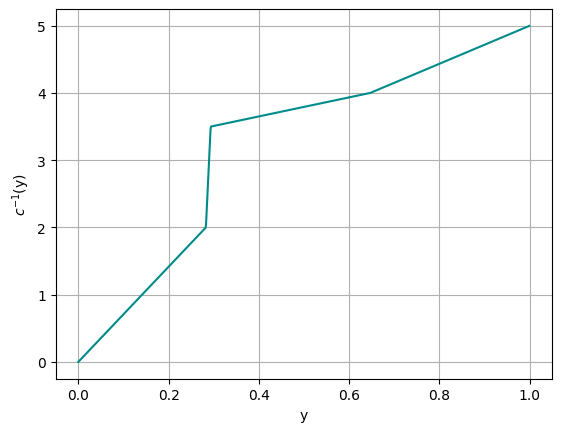

In [22]:
# grafico invesra cumulativa della funzione onda quadra nell'intervallo (0,5)
yc  = np.arange(0,1, 0.001)
xc  = invcum_oq(yc)
plt.plot(yc, xc, color='darkcyan')
plt.grid()
plt.xlabel('y')
plt.ylabel(r'$c^{-1}$(y)')
plt.show()

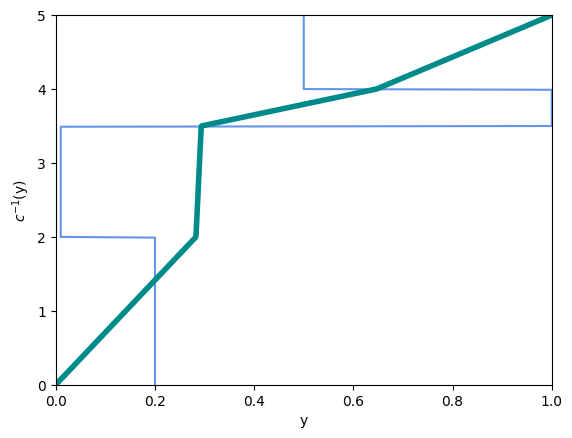

In [46]:
# grafico invesra cumulativa della funzione onda quadra nell'intervallo (0,5)
plt.plot(onda_quadra(xq), xq, color='cornflowerblue')
plt.plot(yc, xc, linewidth=4, color='darkcyan')
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('y')
plt.ylabel(r'$c^{-1}$(y)')
plt.show()

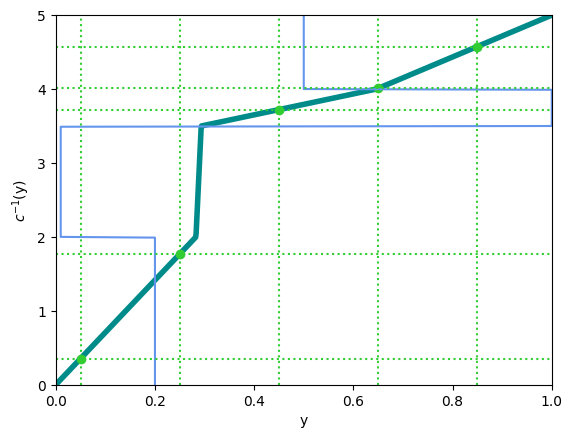

In [45]:
# grafico invesra cumulativa della funzione onda quadra nell'intervallo (0,5)
plt.plot(yc, xc, linewidth=4, color='darkcyan')
# 5 values (0-1)
ycheck = np.arange(0.05,1, 0.2)
xcheck = invcum_oq(ycheck)
plt.plot(ycheck, invcum_oq(ycheck), 'o', color='limegreen')
plt.plot(onda_quadra(xq), xq, color='cornflowerblue')
for yy,xx in zip(ycheck, xcheck):
    plt.axvline(yy, ls=':', color='limegreen')
    plt.axhline(xx, ls=':', color='limegreen')
#plt.grid()
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('y')
plt.ylabel(r'$c^{-1}$(y)')
plt.show()

In [ ]:
# riproduco distribuzione con 10k eventi

# valri y distribuiti uniformemnte in )0-1)
yrndq = np.random.random(nsample)

# valori x da cumulativa inversa
xrndq = invcum_oq(yrndq)

fig, ax = plt.subplots(1,2, figsize=(11,5))
ax[0].hist(yrndq, bins=100, range=(0,1), color='cyan',   ec='darkcyan')
ax[0].set_title('Distribuzione y Cumulativa')
ax[0].set_xlabel('y cumulativa')

ax[1].hist(xrndq, bins=100, range=(0,5), color='orange', ec='darkorange')
ax[1].set_title('Distribuzione secondo la funzione Onda Quadra')
ax[1].set_xlabel('x')
plt.show()

In [ ]:
# confronto distribuziono onda quadra coi due metodi (hit & miss, cumulativa)
plt.hist(xrndq,  bins=100, range=(0,5),            color='orange',     ec='darkorange', label='Cumulativa')
plt.hist(xdistq, bins=100, range=(0,5), alpha=0.6, color='lightgreen', ec='green',      label='Hit & Miss')
plt.xlabel('x')
plt.legend()
plt.show()

print('Totale eventi generati Hit & Miss: {:6d}'.format(len(xdistq)))
print('Totale eventi generati Cumulativa: {:6d}'.format(len(xrndq)))

Notare la differenza di altezza e di eventi totali contenuti degli istogrammi. Per il metodo Hit or Miss sono stati estratti $2 \times 100k$ numeri random, mentre per il metodo della cumulativa solamente $100k$.

## Integrazione Montecarlo



### Metodo Hit or Miss

Il metodo Hit or Miss visto sopra può essere anche utilizzato per calcolare l'integrale di una funzione.

Partendo dall'esempio di prima e considerando che la funzione è racchiusa in un rettangolo $5\times1$
la frazione di eventi selzionata dal metodo Hit or Miss moltiplicata per l'area che racchiude la funzione può essere considerata una stima dell'integrale della funzione stessa:

$$
\int_0^5 f(x) = \frac{n_{Hit}}{n_{samples}} (5 \times 1).
$$

In [47]:
# Integrale analitico
Ia = 0.2*2 + 0.01*(3.5-2) + 1*(4-3.5) + 0.5*(5-4)
print('Integrale Analitico:',Ia)

# Calcolo integrale con metodo Monte Carlo
# nsample corrispnde ai valori di x estartti
# xdistq corrisponde alle x selezionate dal metodo Hi or Miss. 
# len(xdistq) è il numero di punti selezionati
Imc =  len(xdistq)/nsample * (5*1)
print('Integrale Hit or Miss:',Imc)

Integrale Analitico: 1.415
Integrale Hit or Miss: 1.4186


Il metodo di integrazione Monte Cralo risulta particolarmente indicato per funzioni altamente variabili, in cui è difficile selezionare i punti i cui clacolare l'integrale in maniera corretta,  oppure per integrali multidimensionali dove anche un numero limitato di intervalli per dimensione ($n$) corrisponde ad una quantità elevatissima di punti in cui calcolare la funzione $n^d$.

Un esempio di integrale in cui i metodi Monte Carlo possono risultare utili è:

$$
\int_0^2 sin^2 \left(\frac{1}{x(2-x)} \right)
$$


In [48]:
# funzione da integrare
def fmcint(x):
    sinv = np.sin(1/(x*(2-x)))
    return sinv**2

/tmp/ipykernel_5387/2275931939.py:3: RuntimeWarning: divide by zero encountered in divide
  sinv = np.sin(1/(x*(2-x)))
/tmp/ipykernel_5387/2275931939.py:3: RuntimeWarning: invalid value encountered in sin
  sinv = np.sin(1/(x*(2-x)))


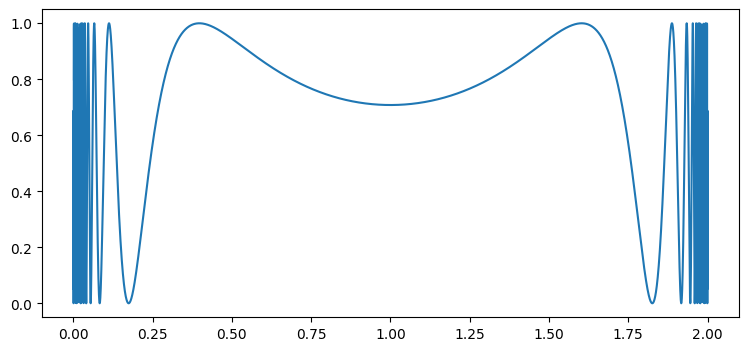

In [49]:
# grafico funzione fra 0 e 2
xmci = np.linspace(0,2, 10000)

plt.subplots(figsize=(9,4))
plt.plot(xmci, fmcint(xmci))
plt.show()

In [50]:
# applico metod Hit or Miss per stimare l'integrale
nsamp_integral = 100000
xrandom02 = np.random.uniform(0,2, nsamp_integral)
yrandom02 = np.random.random(nsamp_integral)
# maschera per selezionare i valori sotto la curva
hitmask   = yrandom02 <= fmcint(xrandom02)
mcintegral = len(yrandom02[hitmask])/nsamp_integral * (2*1)
print('Integrale MC:', mcintegral)

Integrale MC: 1.4469


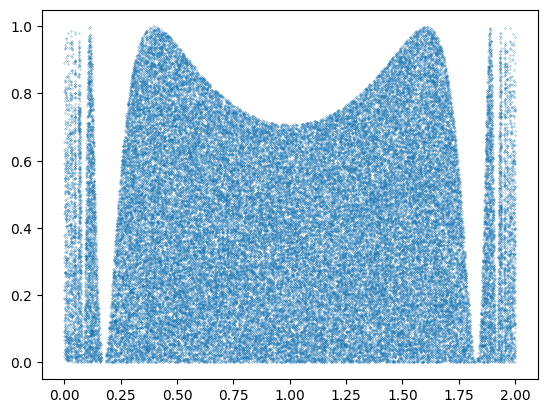

In [51]:
plt.scatter(xrandom02[hitmask],yrandom02[hitmask], s=.05)
#plt.plot(xmci, fmcint(xmci), '-', color='darkcyan')
plt.show()

### Metodo della Media

Come nel caso della generazione di numeri random secondo una data distribuzione, il metodo Hit or Miss non è il più effciente. 

Un metodo che richiede un minor carico computazionale è quello della media.

Dato l'integrale di una funzione nell'intervallo $[a,b]$:

$$
I = \int_a^b f(x)\; dx;
$$

il valor medio della funzione $\bar{f}$ sarà:

$$
\bar{f} = \frac{1}{b-a} \int_a^b f(x) \; dx = \frac{I}{b-a}
$$

da cui possiamo ricavare il valore di $I$:

$$
I = (b-a) \; \bar{f}.
$$

Perciò stimando $\bar{f}$ possiamo stimare $I$.

Un metodo per sitmare $\bar{f}$ è prendere $N$ numeri casuali $x$ uniformemente distribuiti:

$$
\bar{f} \simeq \frac{\sum_{i=1}^N f(x_i)}{N},
$$

da cui otteniamila stima dell'integrale:

$$
I \simeq \frac{b-a}{N} \; \sum_{i=1}^N f(x_i).
$$

In [52]:
# applichiamo il metodo della media alle funzioni precedentemente considerate

nsamplem = 100000

# Onda quadra  
aoq=0
boq=5
xoqm = np.random.uniform(aoq,boq, nsamplem)
yoqm = onda_quadra(xoqm)

Ioq = (boq-aoq)/nsamplem * yoqm.sum()

print('Integrale Onda Quadra con Metodo MC della Media:', Ioq)


# Funzine patologica
af=0
bf=2
xfm = np.random.uniform(af,bf, nsamplem)
yfm = onda_quadra(xfm)

If = (bf-af)/nsamplem * yfm.sum()

print('Integrale Funzione con Metodo MC della Media:', If)

Integrale Onda Quadra con Metodo MC della Media: 1.4128835000000002
Integrale Funzione con Metodo MC della Media: 0.40000000000000013


#### Stima dell'errore

Dal Teorema del limite Centrale sappiamo che la varianza di $\bar{f}$ è legata alla varianza di $f$ secondo la relazione:

$$
var{\bar{f}} = \frac{var f}{N},
$$

la deviazione standard dell'integrale $I$ sarà quindi:

$$
\sigma_I = (b-a)\; stdev(\bar{f}) = (b-a)\; \frac{stdev(f)}{\sqrt{N}} 
$$

## Simulazione Monte Carlo

La simulazione al computer di sistemi o fenomeni gvernati da processi casuali o talmente complessi da apparire casuali avviene tramite la gnerazione di numer random e è chiamata *Simulazione Monte Carlo*

### Esempio: Random Walk 1D

Simuliamo il comportamento  di diffuzione di un insieme di particelle in un sistema monodimensionale.
Le partcelle si muoveranno avanti o indietro con la setssa probabilità e con uno spostamento sempre costante (passo $s$).
Dopo aver definito la dimensionedel passo $s$, seguiamo la seguente procedura iterativa:
* estraiamo a sorte un numero $c_i$ nell'intervallo (0-1)
    1. se $c_i \geq 0.5$ la posizione viene modifcata di $+s$ ($x=x+s$);
    2. altrimenti la posizione viene modifcata di $-s$ ($x=x-s$).
    

In [53]:
# funzione che per generarre sequenza di spostamnti:
def random_walk1d(step, N):
    """
    funzione random_walk1d(step, N) per generare una sequenzadi random walk 1D
    step: passo del random walk (ad ogni iterazione lo spostamento sarà di +- step)
    N   : numero di passi
    reuturn deltax: array con spostamento rispetto all'origine per i diversi passi
    """
    
    deltax = np.array([0])
    tmpx = 0
    check = np.random.random(N)
    for c in check:
        if c >= 0.5:
            tmpx = tmpx+step
        else:
            tmpx = tmpx-step
        deltax = np.append(deltax, tmpx)
    return deltax

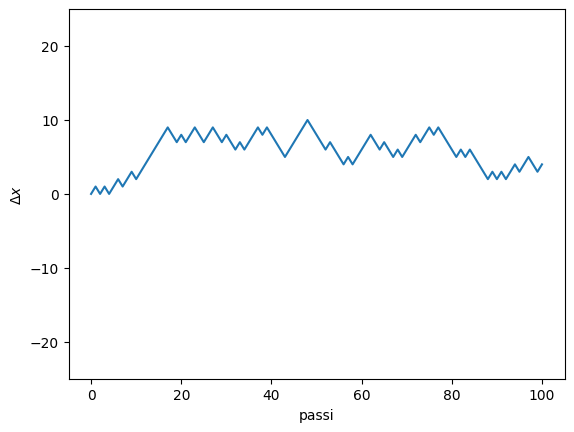

In [54]:
#  genero una sequenza di 100 passi con step=1 
rwN     = 100
rw_step =1
path1 = random_walk1d(rw_step, rwN)


plt.plot(path1)
plt.xlabel('passi')
plt.ylabel(r'$\Delta x$')
plt.ylim(-25,25)
plt.show()

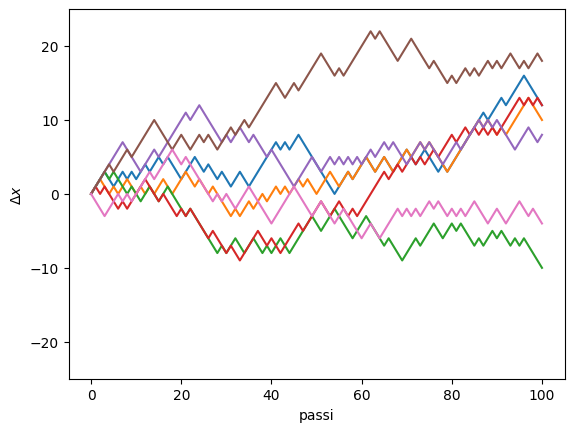

In [55]:
# test più sequenze 

for i in range(7):
    plt.plot(random_walk1d(rw_step, rwN))
plt.xlabel('passi')
plt.ylabel(r'$\Delta x$')
plt.ylim(-25,25)
plt.show()
plt.show()

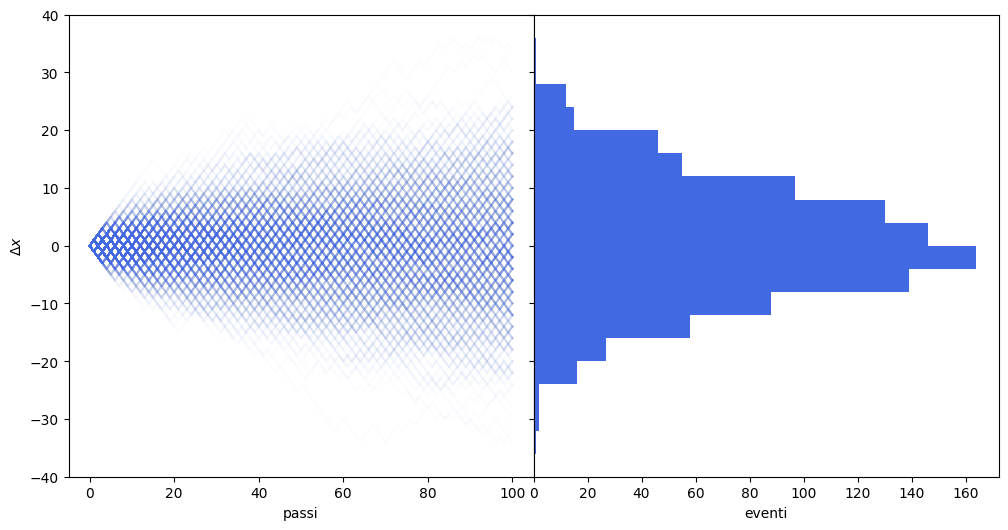

In [56]:
# analisi statistica su 1000 path
Npath = 1000

dxf = np.empty(0)


fig,ax = plt.subplots(1,2, figsize=(12,6), sharey=True)
fig.subplots_adjust(wspace=0)

for ipath in range(Npath):
    
    tmprw = random_walk1d(rw_step, rwN)
    ax[0].plot(tmprw, color='royalblue', alpha=0.02)
    dxf = np.append(dxf, tmprw[-1])

    
ax[0].set_xlabel(r'passi')
ax[0].set_ylabel(r'$\Delta x$')
ax[0].set_ylim(-40,40)

ax[1].hist(dxf, bins=20, range=(-40,40), color='royalblue', orientation="horizontal")
ax[1].set_xlabel('eventi')
plt.show()